In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import yaml

config_file_path = "config/config.yaml"
with open(config_file_path, "r") as f:
    config = yaml.safe_load(f)

dataset_params = config["dataset_params"]
short_analysis_params = config["short_analysis_params"]
long_analysis_params = config["long_analysis_params"]

analysis_dir = os.path.join(dataset_params["root_dir"], dataset_params["run_num"], "analysis")
analysis_dir_train = os.path.join(analysis_dir, "train")
analysis_dir_emulate = os.path.join(analysis_dir, "emulate")

plt_save_dir = os.path.join(dataset_params["root_dir"], dataset_params["run_num"], "plots")
os.makedirs(plt_save_dir, exist_ok=True)

# Temporal Mean

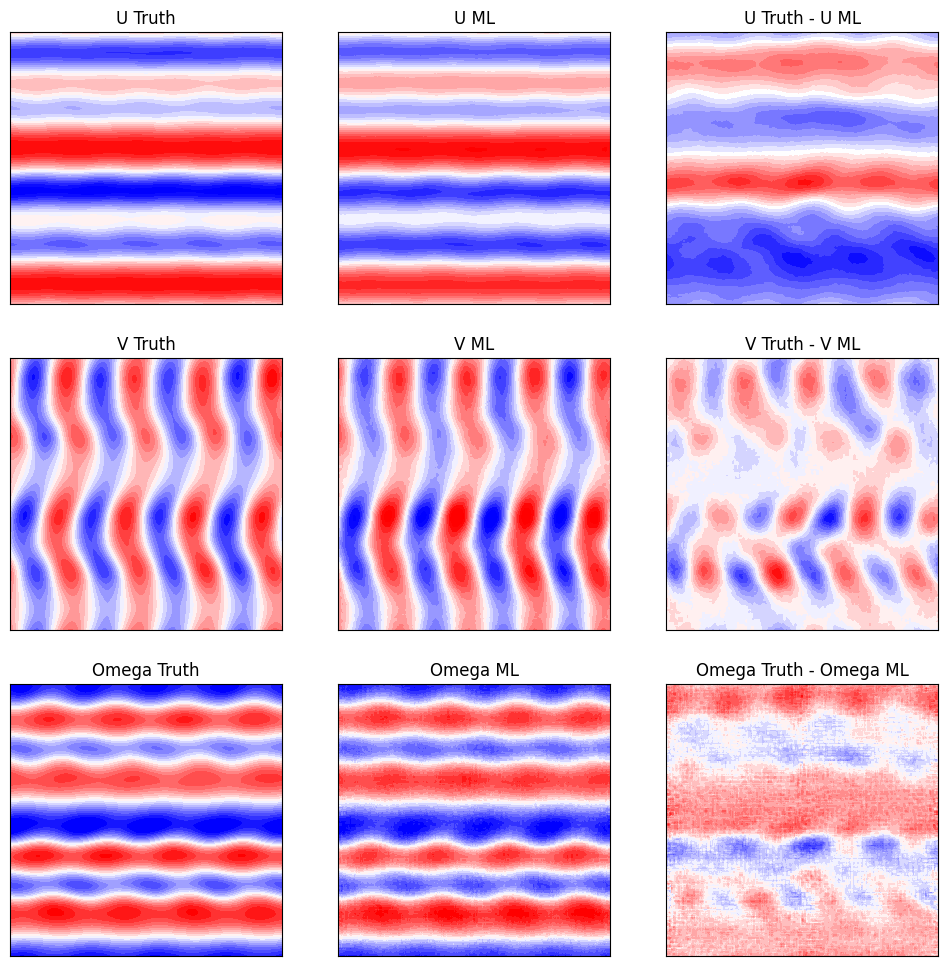

In [2]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
color = ['k', 'k']
marker = ['-', '--']
label = ["Truth", "ML"]

contourlevels = 20

data = np.load(analysis_dir_train + "/temporal_mean.npz")
U_train = data['U_mean']
V_train = data['V_mean']
Omega_train = data['Omega_mean']

data = np.load(analysis_dir_emulate + "/temporal_mean.npz")
U_emulate = data['U_mean']
V_emulate = data['V_mean']
Omega_emulate = data['Omega_mean']

vmax = np.max(U_train)
axes[0,0].contourf(U_train, levels=contourlevels, cmap='bwr', vmax=vmax, vmin=-vmax)
axes[0,0].set_title("U Truth")

axes[0,1].contourf(U_emulate, levels=contourlevels, cmap='bwr', vmax=vmax, vmin=-vmax)
axes[0,1].set_title("U ML")

axes[0,2].contourf(U_emulate - U_train, levels=contourlevels, cmap='bwr')
axes[0,2].set_title("U Truth - U ML")

vmax = np.max(V_train)
axes[1,0].contourf(V_train, levels=contourlevels, cmap='bwr', vmax=vmax, vmin=-vmax)
axes[1,0].set_title("V Truth")

axes[1,1].contourf(V_emulate, levels=contourlevels, cmap='bwr', vmax=vmax, vmin=-vmax)
axes[1,1].set_title("V ML")

axes[1,2].contourf(V_emulate - V_train, levels=contourlevels, cmap='bwr')
axes[1,2].set_title("V Truth - V ML")

vmax = np.max(Omega_train)
axes[2,0].contourf(Omega_train, levels=contourlevels, cmap='bwr', vmax=vmax, vmin=-vmax)
axes[2,0].set_title("Omega Truth")

axes[2,1].contourf(Omega_emulate, levels=contourlevels, cmap='bwr', vmax=vmax, vmin=-vmax)
axes[2,1].set_title("Omega ML")

axes[2,2].contourf(Omega_emulate - Omega_train, levels=contourlevels, cmap='bwr')
axes[2,2].set_title("Omega Truth - Omega ML")

# Set aspect ratio to equal and remove labels for all axes
for ax in axes.flat:
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])

plt.savefig(plt_save_dir + '/temporal_mean.png')


# Zonal Mean

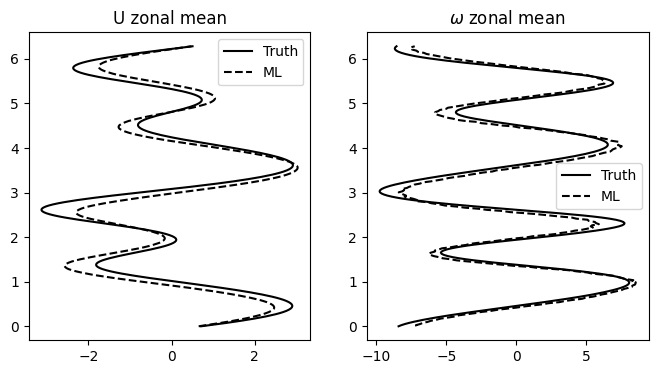

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
color = ['k', 'k']
marker = ['-', '--']
label = ["Truth", "ML"]

for i, analysis_dir_data in enumerate([analysis_dir_train, analysis_dir_emulate]):

    data = np.load(analysis_dir_data + "/zonal_mean.npz")

    U_zonal = data['U_zonal_mean']
    Omega_zonal = data['Omega_zonal_mean']

    y = np.linspace(0, 2*np.pi, Omega_zonal.shape[0])

    axes[0].plot(U_zonal, y, color[i] + marker[i], label=label[i])
    axes[1].plot(Omega_zonal, y, color[i] + marker[i], label=label[i])

    axes[0].set_title(f'U zonal mean')
    axes[1].set_title(f'$\omega$ zonal mean')

axes[0].legend()
axes[1].legend()

plt.savefig(plt_save_dir + '/zonal_mean.png')



## EOF

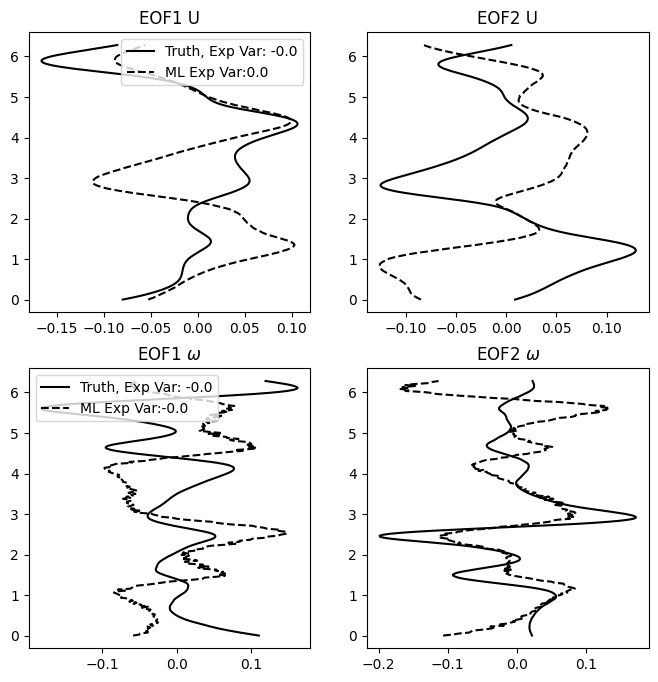

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
color = ['k', 'k']
marker = ['-', '--']
label = ["Truth, Exp Var: ", "ML Exp Var:"]

for i, analysis_dir_data in enumerate([analysis_dir_train, analysis_dir_emulate]):

    data = np.load(analysis_dir_data + "/zonal_eof.npz")

    EOF_U = data["EOF_U"]
    PC_U = data["PC_U"]
    exp_var_U = data["exp_var_U"]

    EOF_Omega = data["EOF_Omega"]
    PC_Omega = data["PC_Omega"]
    exp_var_Omega = data["exp_var_Omega"]

    y = np.linspace(0, 2*np.pi, EOF_Omega.shape[0])

    for count in range(2):
        axes[0,count].plot(EOF_U[:,count], y, color[i] + marker[i], label=label[i] + f'{exp_var_U[count].round(2)}')
        axes[1,count].plot(EOF_Omega[:,count], y, color[i] + marker[i], label=label[i] + f'{exp_var_Omega[count].round(2)}')

        axes[0,count].set_title(f'EOF{count+1} U')
        axes[1,count].set_title(f'EOF{count+1} $\omega$')

axes[0,0].legend()
axes[1,0].legend()

plt.savefig(plt_save_dir + '/zonal_EOFs.png')


# Divergence

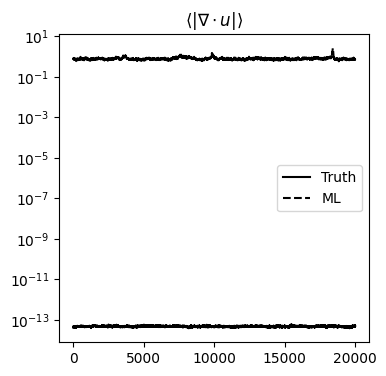

In [5]:
fig, axes = plt.subplots(1, figsize=(4, 4))
color = ['k', 'k']
marker = ['-', '--']
label = ["Truth", "ML"]

for i, analysis_dir_data in enumerate([analysis_dir_train, analysis_dir_emulate]):

    div = np.load(analysis_dir_data + "/div.npy")

    axes.semilogy(div, color[i] + marker[i], label=label[i])

    axes.set_title('$ \langle |\\nabla \cdot u |\\rangle$')

axes.legend()

plt.savefig(plt_save_dir + '/div.png', dpi=600)
